<a href="https://www.kaggle.com/code/amanyazdani2602/exploratory-data-analysis-of-unemployment-data?scriptVersionId=153380753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I've decided on extracting the data from a website named Fred which is a free resource using python api. So I'm going to intall fredapi first.

In [1]:
!pip install fredapi > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

Instead of webscraping the fred website for data I'm using the api. On the Fred website we can generate an api key for ourselves, now because I'm going to be uploading this notebook publically, I'm not just storing the api key in a variable named fred-api for anyone to use. So I used the secrets feature in the add-ons section to store my api key there which I'm retrieving using the following code.

In [3]:
from fredapi import Fred

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred-api")

# Importing The Data

In [4]:
fred=Fred(api_key=fred_key)

Created an object for fred.


In [5]:
sp_search= fred.search('S&P', order_by='popularity')

It is as similar as searching manually on the fred website. Here, I'm trying to search for datasets with high popularity 


In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-12-02,2023-12-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-01 09:00:02-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-12-02,2023-12-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-11-28 08:12:02-06:00,89,"For more information regarding the index, plea..."
SP500,SP500,2023-12-02,2023-12-02,S&P 500,2013-12-02,2023-12-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-12-01 19:11:07-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-12-02,2023-12-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-01 09:00:07-06:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-12-02,2023-12-02,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...


In [7]:
sp_500= fred.get_series(series_id='SP500')
sp_500

2013-12-02    1800.90
2013-12-03    1795.15
2013-12-04    1792.81
2013-12-05    1785.03
2013-12-06    1805.09
               ...   
2023-11-27    4550.43
2023-11-28    4554.89
2023-11-29    4550.58
2023-11-30    4567.80
2023-12-01    4594.63
Length: 2610, dtype: float64

I'm going with the SP500, to import it into a df we need to use fred.get_series and provide the name for the series_id.

# Plotting

I'm plotting to get an idea of what the data looks like.

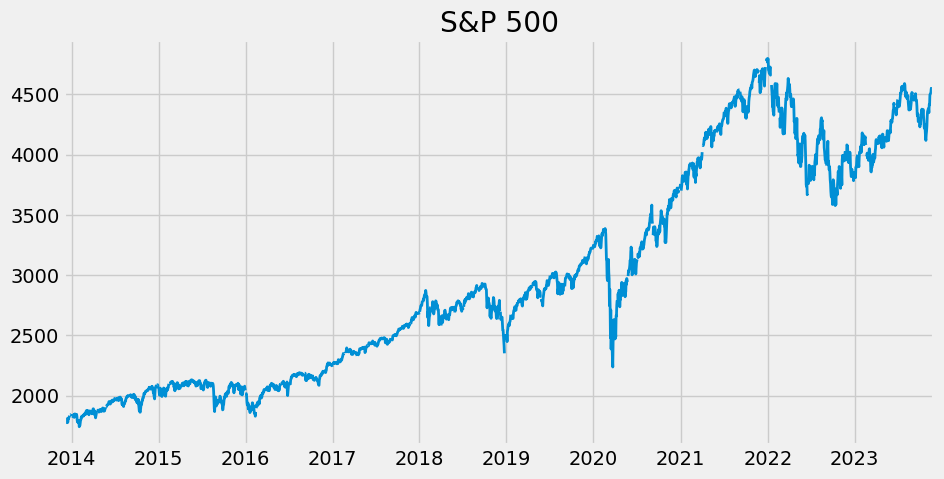

In [8]:
sp_500.plot(figsize=(10,5), title='S&P 500', lw=2)
plt.show()

# Pulling And Joining Multiple Data Series

## Pulling Unemployment Data

Now, I'm going to pull multiple data series from fred to compare them. 

In [9]:
unemp_results= fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-12-02,2023-12-02,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-12-02,2023-12-02,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:14-05:00,57,The unemployment rate represents the number of...
CCSA,CCSA,2023-12-02,2023-12-02,Continued Claims (Insured Unemployment),1967-01-07,2023-11-18,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-11-30 07:34:04-06:00,75,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-12-02,2023-12-02,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,68,"Starting with the July, 2021 report: An Update..."
CCNSA,CCNSA,2023-12-02,2023-12-02,Continued Claims (Insured Unemployment),1967-01-07,2023-11-18,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-11-30 07:34:09-06:00,39,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAORLE0URN,LAORLE0URN,2023-12-02,2023-12-02,"Unemployment Rate in Orleans Parish, LA",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:20:04-06:00,6,These data come from the Current Population Su...
CTFAIR1URN,CTFAIR1URN,2023-12-02,2023-12-02,"Unemployment Rate in Fairfield County, CT",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:12:05-06:00,6,These data come from the Current Population Su...
MDBALT0URN,MDBALT0URN,2023-12-02,2023-12-02,"Unemployment Rate in Baltimore County, MD",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:21:03-06:00,6,These data come from the Current Population Su...


In [10]:
unrate= fred.get_series(series_id='UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

I chose this data because it was monthly data which can be great for comparing.

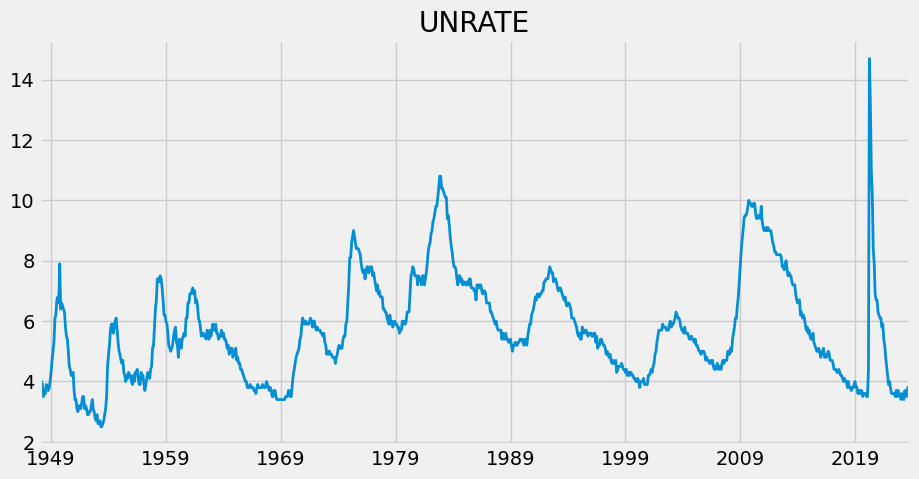

In [11]:
unrate.plot(figsize=(10,5), title=('UNRATE'), lw=2)
plt.show()

In [12]:
unemp_df= fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-12-02,2023-12-02,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-12-02,2023-12-02,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:14-05:00,57,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-12-02,2023-12-02,Unemployment Level,1948-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:50:05-05:00,69,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-12-02,2023-12-02,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-12-02,2023-12-02,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:35-05:00,18,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MILIVI3URN,MILIVI3URN,2023-12-02,2023-12-02,"Unemployment Rate in Livingston County, MI",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:14:20-06:00,3,These data come from the Current Population Su...
NCCOLU0URN,NCCOLU0URN,2023-12-02,2023-12-02,"Unemployment Rate in Columbus County, NC",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:20:05-06:00,3,These data come from the Current Population Su...
WVCABE1URN,WVCABE1URN,2023-12-02,2023-12-02,"Unemployment Rate in Cabell County, WV",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:20:03-06:00,3,These data come from the Current Population Su...


Now this df has many unwanted categories and data we need to filter out. I want data that is seasonally adjusted and in percent. For that we need to run query on the existing df.

In [13]:
unemp_df= unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
unemp_df.shape

(162, 15)

I also only want the rows that has 'Unemployment Rate' in their title.

In [14]:
unemp_df= unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.shape

(99, 15)

In [15]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-12-02,2023-12-02,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-12-02,2023-12-02,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-12-02,2023-12-02,Unemployment Rate in California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:01-06:00,63,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-12-02,2023-12-02,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,56,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-12-02,2023-12-02,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,10,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000015,LNS14000015,2023-12-02,2023-12-02,"Unemployment Rate - 16-19 Yrs., White",1954-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:55-05:00,4,The series comes from the 'Current Population ...
LNS14100000,LNS14100000,2023-12-02,2023-12-02,Unemployment Rate Full-Time Workers,1968-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:55-05:00,3,The series comes from the 'Current Population ...
LNS14000093,LNS14000093,2023-12-02,2023-12-02,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:45-05:00,3,The series comes from the 'Current Population ...


It can be observed that we have data for unemployment for different states.


lets store all of them in one place.

In [16]:
all_results=[]

for my_id in unemp_df.index:
    results= fred.get_series(my_id)
    results= results.to_frame(name= my_id)
    all_results.append(results)

In [17]:
all_results[1]

,LNS14000006
1972-01-01,11.2
1972-02-01,11.2
1972-03-01,10.7
1972-04-01,9.8
1972-05-01,10.2
...,...
2023-06-01,6.0
2023-07-01,5.8
2023-08-01,5.3
2023-09-01,5.7


I only want data that has unemployment with respect to state, so I'll remove everything else.


Also. I need to concat the data in the list 'all_results' by row.

In [18]:
unemp_results= pd.concat(all_results, axis=1).drop(['UNRATE','LNS14000006', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
        'LNS14000024', 'U2RATE', 'LNS14000002',
       'LNS14000031', 'LNS14000009', 'LNS14027662', 'LNS14000003',
       'LNS14000001', 'LNS14027660',
       'LNS14024887',
       'LRUN64TTUSM156S', 'LNS14027659', 
       'LNS14000012', 
        'LNS14032183', 'LASMT261982000000003',
        'LNS14000060', 'LNS14000036',
       'LNS14000018', 'LNS14000028', 'LASMT391746000000003', 'CMWRUR',
       'CNERUR', 'LNS14027689', 'LNS14024230', 'LNS14000048', 'CWSTUR',
       'CNEWUR', 'LNS14000315', 'LNS14000025', 'CSOUUR', 'LNS14000032',
       'LNS14000150', 'LNS14200000', 'LNS14000026', 'LNS14000089',
       'LRUN24TTUSM156S', 'LRUNTTTTUSM156S', 'LNS14000015',
       'M08320USM156SNBR', 'LNS14000029', 'CENCUR', 'LNS14100000', 'LNS14000093', 'PRUR'], axis=1)
unemp_results

,CAUR,TXUR,NYUR,FLUR,ALUR,OHUR,MIUR,ILUR,PAUR,NCUR,COUR,MAUR,GAUR,MNUR,NJUR,KYUR,WIUR,NMUR,VAUR,TNUR,ORUR,AZUR,ARUR,WAUR,MDUR,IAUR,INUR,SCUR,AKUR,UTUR,WVUR,MOUR,LAUR,NVUR,OKUR,NDUR,HIUR,MTUR,NEUR,IDUR,KSUR,CTUR,MSUR,NHUR,DCUR,WYUR,MEUR,DEUR,SDUR,RIUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,4.1,3.9,2.6,2.2,3.4,3.6,4.0,3.8,3.3,2.8,2.6,3.2,2.9,3.7,3.8,2.5,3.5,2.7,3.2,3.5,3.5,2.6,3.8,2.0,2.7,3.2,3.1,3.7,2.4,3.3,2.6,3.6,5.4,2.7,2.0,3.0,2.4,1.9,2.7,2.8,3.7,3.1,1.8,5.1,3.1,2.4,4.2,1.8,2.9,1.9
2023-07-01,4.6,4.1,3.9,2.7,2.1,3.3,3.6,4.0,3.5,3.3,2.9,2.5,3.2,3.0,3.9,3.9,2.6,3.6,2.5,3.1,3.4,3.6,2.6,3.6,1.8,2.7,3.3,3.1,3.8,2.4,3.4,2.7,3.4,5.3,2.7,2.0,2.8,2.5,2.0,2.8,2.7,3.6,3.0,1.7,5.0,3.0,2.4,4.1,1.9,2.8,1.8
2023-08-01,4.6,4.1,3.9,2.7,2.1,3.4,3.7,4.1,3.5,3.3,3.1,2.6,3.3,3.1,4.2,4.0,2.9,3.7,2.5,3.1,3.4,3.8,2.7,3.6,1.7,2.9,3.4,3.0,3.9,2.5,3.6,2.8,3.3,5.4,2.8,1.9,2.8,2.5,2.0,3.0,2.7,3.5,3.2,1.8,5.0,2.9,2.5,4.1,1.9,2.7,1.8
2023-09-01,4.7,4.1,4.0,2.8,2.2,3.4,3.9,4.4,3.4,3.4,3.2,2.6,3.4,3.1,4.4,4.1,3.1,3.7,2.5,3.2,3.5,4.0,2.9,3.6,1.6,3.0,3.6,2.9,4.1,2.6,3.8,2.9,3.3,5.4,3.0,1.9,2.8,2.7,2.1,3.1,2.8,3.5,3.2,2.0,5.0,2.9,2.7,4.1,1.9,2.6,1.9


Now removing the null values

<Axes: >

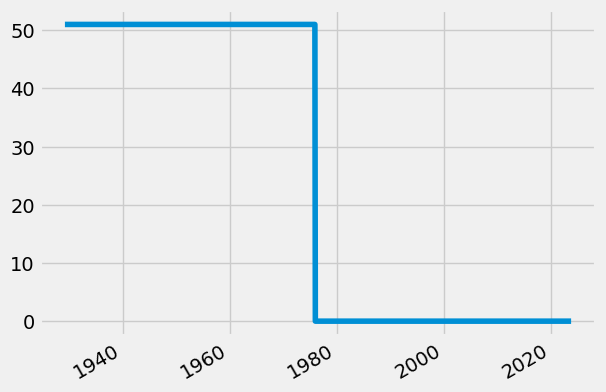

In [19]:
unemp_results.isnull().sum(axis=1).plot()

Can be observed that before 1980 there are steady amount of many null values, through this we can figure out that prior to 1980 the unemployment rates weren't recorded, so that justifies so many outliers.

In [20]:
unemp_states= unemp_results.dropna()
unemp_states

,CAUR,TXUR,NYUR,FLUR,ALUR,OHUR,MIUR,ILUR,PAUR,NCUR,COUR,MAUR,GAUR,MNUR,NJUR,KYUR,WIUR,NMUR,VAUR,TNUR,ORUR,AZUR,ARUR,WAUR,MDUR,IAUR,INUR,SCUR,AKUR,UTUR,WVUR,MOUR,LAUR,NVUR,OKUR,NDUR,HIUR,MTUR,NEUR,IDUR,KSUR,CTUR,MSUR,NHUR,DCUR,WYUR,MEUR,DEUR,SDUR,RIUR,VTUR
1976-01-01,9.2,5.8,10.3,9.7,6.6,8.1,9.9,6.6,8.0,6.4,5.8,10.5,8.4,6.0,10.3,5.6,5.8,8.6,6.1,6.0,9.5,10.2,7.3,8.5,6.4,4.3,6.6,7.4,7.1,5.8,7.5,5.9,6.3,9.2,5.8,3.4,9.8,5.8,3.3,5.6,4.2,9.8,6.7,6.5,8.7,4.1,8.7,8.0,3.3,7.8,8.6
1976-02-01,9.2,5.8,10.3,9.7,6.6,8.1,9.9,6.6,8.1,6.4,5.7,10.5,8.4,6.0,10.3,5.6,5.8,8.7,6.1,6.0,9.5,10.2,7.3,8.5,6.4,4.3,6.6,7.4,7.1,5.9,7.5,5.9,6.3,9.2,5.8,3.4,9.8,5.8,3.3,5.6,4.2,9.8,6.7,6.5,8.7,4.1,8.7,8.0,3.3,7.8,8.6
1976-03-01,9.1,5.9,10.2,9.6,6.6,8.1,9.9,6.6,8.1,6.4,5.7,10.5,8.4,5.9,10.3,5.6,5.7,8.7,6.1,6.0,9.4,10.1,7.3,8.4,6.4,4.3,6.5,7.3,7.0,5.8,7.5,5.9,6.3,9.2,5.8,3.4,9.8,5.8,3.3,5.6,4.2,9.8,6.6,6.5,8.6,4.1,8.6,8.0,3.2,7.7,8.6
1976-04-01,9.1,5.9,10.2,9.5,6.5,8.0,9.8,6.6,8.1,6.3,5.6,10.3,8.3,5.8,10.3,5.6,5.6,8.6,6.0,6.0,9.2,10.0,7.2,8.5,6.4,4.2,6.3,7.2,6.9,5.8,7.5,6.0,6.4,9.0,5.8,3.5,9.7,5.8,3.2,5.6,4.2,9.6,6.4,6.5,8.5,4.0,8.6,8.1,3.1,7.7,8.6
1976-05-01,9.0,5.9,10.1,9.3,6.4,7.8,9.6,6.6,8.1,6.1,5.6,10.1,8.1,5.7,10.3,5.5,5.5,8.6,5.9,5.9,9.1,9.8,7.1,8.5,6.5,4.1,6.0,7.0,6.9,5.7,7.4,6.0,6.5,8.9,5.7,3.6,9.4,5.8,3.1,5.6,4.2,9.4,6.3,6.5,8.4,3.9,8.5,8.3,3.1,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,4.1,3.9,2.6,2.2,3.4,3.6,4.0,3.8,3.3,2.8,2.6,3.2,2.9,3.7,3.8,2.5,3.5,2.7,3.2,3.5,3.5,2.6,3.8,2.0,2.7,3.2,3.1,3.7,2.4,3.3,2.6,3.6,5.4,2.7,2.0,3.0,2.4,1.9,2.7,2.8,3.7,3.1,1.8,5.1,3.1,2.4,4.2,1.8,2.9,1.9
2023-07-01,4.6,4.1,3.9,2.7,2.1,3.3,3.6,4.0,3.5,3.3,2.9,2.5,3.2,3.0,3.9,3.9,2.6,3.6,2.5,3.1,3.4,3.6,2.6,3.6,1.8,2.7,3.3,3.1,3.8,2.4,3.4,2.7,3.4,5.3,2.7,2.0,2.8,2.5,2.0,2.8,2.7,3.6,3.0,1.7,5.0,3.0,2.4,4.1,1.9,2.8,1.8
2023-08-01,4.6,4.1,3.9,2.7,2.1,3.4,3.7,4.1,3.5,3.3,3.1,2.6,3.3,3.1,4.2,4.0,2.9,3.7,2.5,3.1,3.4,3.8,2.7,3.6,1.7,2.9,3.4,3.0,3.9,2.5,3.6,2.8,3.3,5.4,2.8,1.9,2.8,2.5,2.0,3.0,2.7,3.5,3.2,1.8,5.0,2.9,2.5,4.1,1.9,2.7,1.8
2023-09-01,4.7,4.1,4.0,2.8,2.2,3.4,3.9,4.4,3.4,3.4,3.2,2.6,3.4,3.1,4.4,4.1,3.1,3.7,2.5,3.2,3.5,4.0,2.9,3.6,1.6,3.0,3.6,2.9,4.1,2.6,3.8,2.9,3.3,5.4,3.0,1.9,2.8,2.7,2.1,3.1,2.8,3.5,3.2,2.0,5.0,2.9,2.7,4.1,1.9,2.6,1.9


Successfully removed the null values.

I also want to make a column in the unemp_states df named title which should replace the state id with its name in the plots.


In [21]:
id_to_state= unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns= [id_to_state[c] for c in unemp_states.columns]
unemp_states

,California,Texas,New York,Florida,Alabama,Ohio,Michigan,Illinois,Pennsylvania,North Carolina,Colorado,Massachusetts,Georgia,Minnesota,New Jersey,Kentucky,Wisconsin,New Mexico,Virginia,Tennessee,Oregon,Arizona,Arkansas,Washington,Maryland,Iowa,Indiana,South Carolina,Alaska,Utah,West Virginia,Missouri,Louisiana,Nevada,Oklahoma,North Dakota,Hawaii,Montana,Nebraska,Idaho,Kansas,Connecticut,Mississippi,New Hampshire,the District of Columbia,Wyoming,Maine,Delaware,South Dakota,Rhode Island,Vermont
1976-01-01,9.2,5.8,10.3,9.7,6.6,8.1,9.9,6.6,8.0,6.4,5.8,10.5,8.4,6.0,10.3,5.6,5.8,8.6,6.1,6.0,9.5,10.2,7.3,8.5,6.4,4.3,6.6,7.4,7.1,5.8,7.5,5.9,6.3,9.2,5.8,3.4,9.8,5.8,3.3,5.6,4.2,9.8,6.7,6.5,8.7,4.1,8.7,8.0,3.3,7.8,8.6
1976-02-01,9.2,5.8,10.3,9.7,6.6,8.1,9.9,6.6,8.1,6.4,5.7,10.5,8.4,6.0,10.3,5.6,5.8,8.7,6.1,6.0,9.5,10.2,7.3,8.5,6.4,4.3,6.6,7.4,7.1,5.9,7.5,5.9,6.3,9.2,5.8,3.4,9.8,5.8,3.3,5.6,4.2,9.8,6.7,6.5,8.7,4.1,8.7,8.0,3.3,7.8,8.6
1976-03-01,9.1,5.9,10.2,9.6,6.6,8.1,9.9,6.6,8.1,6.4,5.7,10.5,8.4,5.9,10.3,5.6,5.7,8.7,6.1,6.0,9.4,10.1,7.3,8.4,6.4,4.3,6.5,7.3,7.0,5.8,7.5,5.9,6.3,9.2,5.8,3.4,9.8,5.8,3.3,5.6,4.2,9.8,6.6,6.5,8.6,4.1,8.6,8.0,3.2,7.7,8.6
1976-04-01,9.1,5.9,10.2,9.5,6.5,8.0,9.8,6.6,8.1,6.3,5.6,10.3,8.3,5.8,10.3,5.6,5.6,8.6,6.0,6.0,9.2,10.0,7.2,8.5,6.4,4.2,6.3,7.2,6.9,5.8,7.5,6.0,6.4,9.0,5.8,3.5,9.7,5.8,3.2,5.6,4.2,9.6,6.4,6.5,8.5,4.0,8.6,8.1,3.1,7.7,8.6
1976-05-01,9.0,5.9,10.1,9.3,6.4,7.8,9.6,6.6,8.1,6.1,5.6,10.1,8.1,5.7,10.3,5.5,5.5,8.6,5.9,5.9,9.1,9.8,7.1,8.5,6.5,4.1,6.0,7.0,6.9,5.7,7.4,6.0,6.5,8.9,5.7,3.6,9.4,5.8,3.1,5.6,4.2,9.4,6.3,6.5,8.4,3.9,8.5,8.3,3.1,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,4.1,3.9,2.6,2.2,3.4,3.6,4.0,3.8,3.3,2.8,2.6,3.2,2.9,3.7,3.8,2.5,3.5,2.7,3.2,3.5,3.5,2.6,3.8,2.0,2.7,3.2,3.1,3.7,2.4,3.3,2.6,3.6,5.4,2.7,2.0,3.0,2.4,1.9,2.7,2.8,3.7,3.1,1.8,5.1,3.1,2.4,4.2,1.8,2.9,1.9
2023-07-01,4.6,4.1,3.9,2.7,2.1,3.3,3.6,4.0,3.5,3.3,2.9,2.5,3.2,3.0,3.9,3.9,2.6,3.6,2.5,3.1,3.4,3.6,2.6,3.6,1.8,2.7,3.3,3.1,3.8,2.4,3.4,2.7,3.4,5.3,2.7,2.0,2.8,2.5,2.0,2.8,2.7,3.6,3.0,1.7,5.0,3.0,2.4,4.1,1.9,2.8,1.8
2023-08-01,4.6,4.1,3.9,2.7,2.1,3.4,3.7,4.1,3.5,3.3,3.1,2.6,3.3,3.1,4.2,4.0,2.9,3.7,2.5,3.1,3.4,3.8,2.7,3.6,1.7,2.9,3.4,3.0,3.9,2.5,3.6,2.8,3.3,5.4,2.8,1.9,2.8,2.5,2.0,3.0,2.7,3.5,3.2,1.8,5.0,2.9,2.5,4.1,1.9,2.7,1.8
2023-09-01,4.7,4.1,4.0,2.8,2.2,3.4,3.9,4.4,3.4,3.4,3.2,2.6,3.4,3.1,4.4,4.1,3.1,3.7,2.5,3.2,3.5,4.0,2.9,3.6,1.6,3.0,3.6,2.9,4.1,2.6,3.8,2.9,3.3,5.4,3.0,1.9,2.8,2.7,2.1,3.1,2.8,3.5,3.2,2.0,5.0,2.9,2.7,4.1,1.9,2.6,1.9


Now, I'm going to plot a the unemp_states data on a line.

In [22]:
px.line(unemp_states)

I can observe that there is a huge jump in the line at May 2020. So, I'll pull up the data for each states on May 2020.

In [23]:
unemp_states.loc[unemp_states.index=='2020-05-01']

,California,Texas,New York,Florida,Alabama,Ohio,Michigan,Illinois,Pennsylvania,North Carolina,Colorado,Massachusetts,Georgia,Minnesota,New Jersey,Kentucky,Wisconsin,New Mexico,Virginia,Tennessee,Oregon,Arizona,Arkansas,Washington,Maryland,Iowa,Indiana,South Carolina,Alaska,Utah,West Virginia,Missouri,Louisiana,Nevada,Oklahoma,North Dakota,Hawaii,Montana,Nebraska,Idaho,Kansas,Connecticut,Mississippi,New Hampshire,the District of Columbia,Wyoming,Maine,Delaware,South Dakota,Rhode Island,Vermont
2020-05-01,15.7,11.6,16.6,14.1,10.4,12.7,19.1,14.7,12.9,11.6,11.6,15.5,9.7,11.1,15.3,12.8,10.5,9.3,10.0,12.1,11.8,11.2,8.9,13.2,8.8,8.3,12.4,9.2,11.9,7.7,12.4,9.5,12.2,24.7,9.7,7.2,20.8,9.2,6.3,9.0,9.3,11.7,11.2,11.7,8.8,8.7,9.4,13.4,6.6,15.4,9.5


I'll transpose this and sort the order before I make a barplot.

In [24]:
unemp_states.loc[unemp_states.index=='2020-05-01'].T \
    .sort_values('2020-05-01')

,2020-05-01
Nebraska,6.3
South Dakota,6.6
North Dakota,7.2
Utah,7.7
Iowa,8.3
Wyoming,8.7
the District of Columbia,8.8
Maryland,8.8
Arkansas,8.9
Idaho,9.0


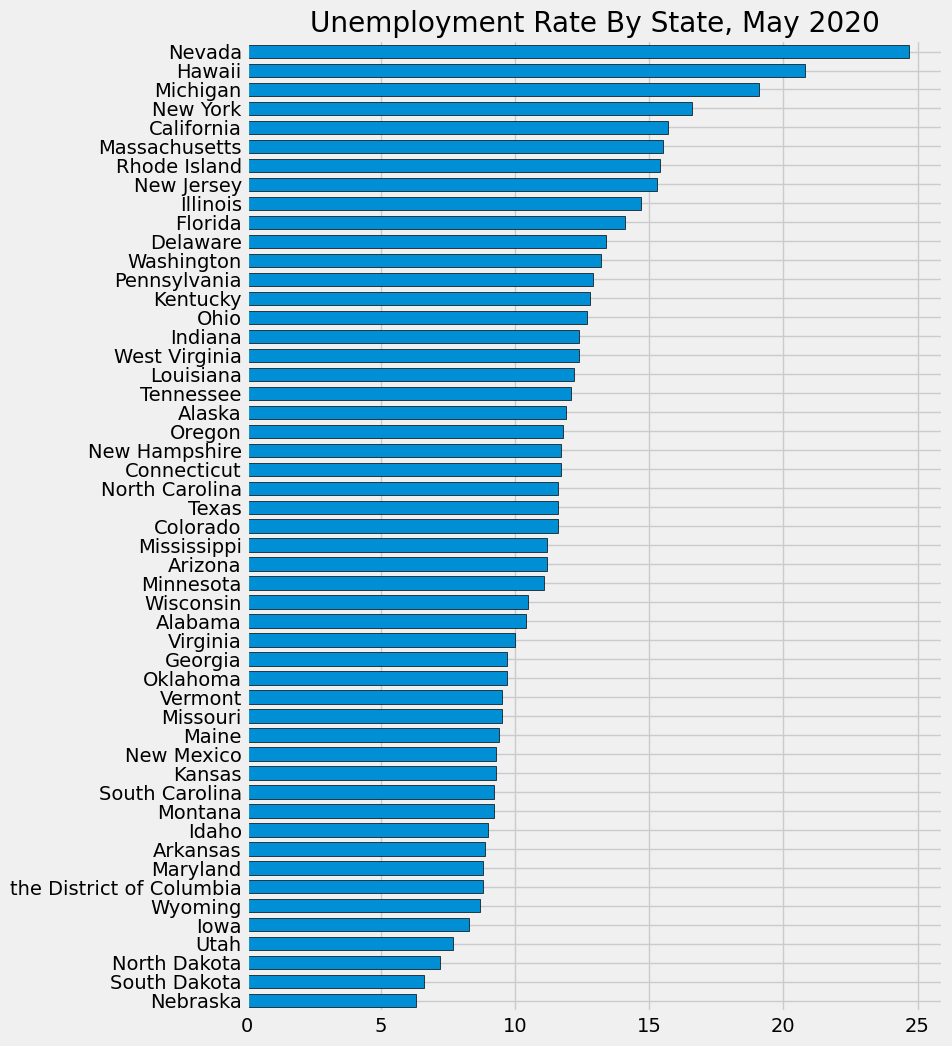

In [25]:
x= unemp_states.loc[unemp_states.index=='2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), title='Unemployment Rate By State, May 2020', width=0.7, edgecolor='black')
x.legend().remove()
plt.show()

## Pulling Participation Data 

In [26]:
participation_df= fred.search('participation rate state', filter=('frequency', 'Monthly'))
participation_df= participation_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
participation_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-12-02,2023-12-02,Labor Force Participation Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,83,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-12-02,2023-12-02,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:11-05:00,65,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-12-02,2023-12-02,Labor Force Participation Rate - Women,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:09-05:00,65,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-12-02,2023-12-02,Labor Force Participation Rate - Men,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:14-05:00,57,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-12-02,2023-12-02,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:20-05:00,49,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRINTTMAUSM156S,LRINTTMAUSM156S,2023-12-02,2023-12-02,Inactivity Rate: Aged 15 and over: Males for U...,1975-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:43-06:00,1,OECD Descriptor ID: LRINTTMA OECD unit ID: PC ...
LRINTTFEUSM156S,LRINTTFEUSM156S,2023-12-02,2023-12-02,Inactivity Rate: Aged 15 and over: Females for...,1975-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:43-06:00,1,OECD Descriptor ID: LRINTTFE OECD unit ID: PC ...
LRIN74TTUSM156S,LRIN74TTUSM156S,2023-12-02,2023-12-02,Inactivity Rate: Aged 15-74: All Persons for U...,1981-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:38:08-06:00,0,OECD Descriptor ID: LRIN74TT OECD unit ID: PC ...


In [27]:
participation_id_to_state= participation_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
all_results=[]

for the_id in participation_df.index:
    results= fred.get_series(the_id)
    results= results.to_frame(name= the_id)
    all_results.append(results)
    time.sleep(0.1)

In [28]:
part_states= pd.concat(all_results, axis=1)
part_states.columns= [participation_id_to_state[c] for c in part_states.columns]

In [29]:
part_states= part_states.drop(['Labor Force Participation Rate','Labor Force Participation Rate - 25-54 Yrs.','Labor Force Participation Rate - Women',
                 'Labor Force Participation Rate - Men','Labor Force Participation Rate - 55 Yrs. & over','Labor Force Participation Rate - 16-19 Yrs.',
                 'Labor Force Participation Rate - 20-24 Yrs.','Activity Rate: Aged 25-54: Males for United States','Labor Force Participation Rate - Black or African American',
                 'Activity Rate: Aged 25-54: Females for United States',"Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
                 'Labor Force Participation Rate - 20 Yrs. & over, Black or African American Women','Labor Force Participation Rate - 20 Yrs. & over, White Men',
                 'Labor Force Participation Rate - 20 Yrs. & over, Black or African American Men','Labor Force Participation Rate - White',
                 'Labor Force Participation Rate - Hispanic or Latino','Labor Force Participation Rate - 20 Yrs. & over, Women',
                  'Labor Force Participation Rate - High School Graduates, No College, 25 Yrs. & over','Inactivity Rate: Aged 15-64: All Persons for United States',
                 'Labor Force Participation Rate - 20 Yrs. & over, White Women','Activity Rate: Aged 15-64: All Persons for United States',
                  'Labor Force Participation Rate - 20 Yrs. & over, Men','Labor Force Participation Rate - Less Than a High School Diploma, 25 Yrs. & over',
                 'Activity Rate: Aged 55-64: All Persons for United States','Labor Force Participation Rate - Some College or Associate Degree, 25 Yrs. & over',
                 'Labor Force Participation Rate - 16-19 Yrs., Black or African American','Labor Force Participation Rate - 16-19 Yrs., White',
                 'Inactivity Rate: Aged 25-54: Males for United States','Activity Rate: Aged 15-64: Females for United States','Activity Rate: Aged 55-64: Males for United States',
                 'Activity Rate: Aged 15-24: Females for United States','Activity Rate: Aged 15-24: Males for United States','Activity Rate: Aged 55-64: Females for United States',
                 'Inactivity Rate: Aged 55-64: Males for United States','Inactivity Rate: Aged 15-24: Females for United States','Inactivity Rate: Aged 15-24: Males for United States',
                 'Inactivity Rate: Aged 55-64: Females for United States','Activity Rate: Aged 15-74: Males for United States','Activity Rate: Aged 15-74: Females for United States',
                 'Inactivity Rate: Aged 15-74: Males for United States','Inactivity Rate: Aged 15-64: Males for United States','Inactivity Rate: Aged 15-74: Females for United States',
                 'Inactivity Rate: Aged 15-64: Females for United States','Inactivity Rate: Aged 15-64: Females for United States','Activity Rate: Aged 15-64: Males for United States',
                 'Inactivity Rate: Aged 25-54: Females for United States','Inactivity Rate: Aged 55-64: All Persons for United States','Activity Rate: Aged 15-24: All Persons for United States',
                 'Activity Rate: Aged 25-54: All Persons for United States','Activity Rate: Aged 15-74: All Persons for United States','Inactivity Rate: Aged 15-24: All Persons for United States',
                 'Inactivity Rate: Aged 25-54: All Persons for United States','Activity Rate: Aged 15 and over: Males for United States',
                  'Activity Rate: Aged 15 and over: Females for United States','Inactivity Rate: Aged 15 and over: Males for United States','Inactivity Rate: Aged 15 and over: Females for United States',
                 'Inactivity Rate: Aged 15-74: All Persons for United States','Inactivity Rate: Aged 15 and over: All Persons for United States',
                 'Activity Rate: Aged 15 and over: All Persons for United States'],axis=1)

In [30]:
part_states

,California,Alabama,Florida,Kentucky,Michigan,Wisconsin,New York,Ohio,Texas,Maryland,Georgia,Minnesota,Mississippi,Virginia,Pennsylvania,Colorado,West Virginia,New Mexico,Tennessee,Illinois,Louisiana,Utah,Washington,Maine,Massachusetts,South Carolina,Iowa,Arizona,New Hampshire,Connecticut,North Carolina,Oklahoma,Oregon,Nebraska,Indiana,New Jersey,Alaska,Missouri,Nevada,Arkansas,Idaho,Montana,Kansas,North Dakota,South Dakota,Hawaii,Vermont,Wyoming,Delaware,Rhode Island,District Of Columbia
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,62.5,57.0,59.5,57.8,60.7,65.3,61.2,62.2,64.2,65.3,61.3,68.4,54.5,66.6,62.0,68.7,54.6,57.0,59.3,64.6,59.5,69.6,64.7,58.4,64.6,56.7,68.7,61.7,65.2,64.1,60.7,61.4,62.0,69.5,63.6,65.4,65.3,63.6,61.5,57.6,62.5,62.8,66.8,69.7,67.9,60.4,63.8,64.6,60.0,63.2,70.8
2023-07-01,62.4,57.0,59.7,57.7,61.0,65.5,61.4,62.1,64.2,65.3,61.4,68.5,54.4,66.7,61.9,68.7,54.7,57.1,59.4,64.4,59.3,69.8,64.7,58.5,64.5,56.9,68.8,61.8,64.9,64.1,60.7,61.6,61.8,69.4,63.6,65.5,65.2,63.6,61.6,57.7,62.4,62.7,66.8,69.7,67.8,60.3,63.9,64.6,60.1,63.3,70.8
2023-08-01,62.4,57.0,59.7,57.6,61.3,65.7,61.5,62.1,64.2,65.3,61.4,68.5,54.3,66.7,61.9,68.7,54.9,57.2,59.4,64.4,59.0,69.8,64.6,58.6,64.5,57.0,68.7,61.8,64.6,64.1,60.8,61.8,61.7,69.2,63.5,65.5,65.2,63.7,61.7,57.7,62.4,62.7,66.7,69.5,67.8,60.2,64.0,64.5,60.3,63.3,70.9
2023-09-01,62.3,57.0,59.8,57.4,61.6,65.8,61.6,62.1,64.2,65.2,61.5,68.5,54.1,66.8,61.9,68.6,55.1,57.2,59.4,64.5,58.9,69.7,64.5,58.7,64.4,57.0,68.6,61.9,64.6,64.1,60.9,62.1,61.7,69.2,63.4,65.4,65.2,63.7,61.9,57.8,62.4,62.6,66.7,69.3,67.8,60.2,64.1,64.4,60.5,63.4,71.1


In [31]:
part_states=part_states.dropna()
part_states

,California,Alabama,Florida,Kentucky,Michigan,Wisconsin,New York,Ohio,Texas,Maryland,Georgia,Minnesota,Mississippi,Virginia,Pennsylvania,Colorado,West Virginia,New Mexico,Tennessee,Illinois,Louisiana,Utah,Washington,Maine,Massachusetts,South Carolina,Iowa,Arizona,New Hampshire,Connecticut,North Carolina,Oklahoma,Oregon,Nebraska,Indiana,New Jersey,Alaska,Missouri,Nevada,Arkansas,Idaho,Montana,Kansas,North Dakota,South Dakota,Hawaii,Vermont,Wyoming,Delaware,Rhode Island,District Of Columbia
1976-01-01,62.6,57.0,55.8,60.5,61.6,65.6,58.0,61.7,63.8,64.3,63.7,65.6,58.8,65.9,58.4,67.2,52.5,60.8,59.6,63.0,56.8,62.8,60.9,62.1,64.8,65.3,64.4,59.5,65.9,64.2,66.5,59.3,62.9,64.9,64.0,61.5,69.0,60.5,71.3,57.9,63.0,62.7,65.1,62.6,64.6,69.9,63.6,65.3,62.7,63.8,64.4
1976-02-01,62.4,56.9,55.7,60.3,61.5,65.5,58.0,61.7,63.5,64.2,63.6,65.5,58.6,65.8,58.3,67.0,52.4,60.5,59.4,63.0,56.6,62.6,60.7,61.9,64.7,65.2,64.3,59.2,65.6,64.1,66.3,59.2,62.7,64.9,63.9,61.4,68.4,60.3,70.8,57.8,62.8,62.5,65.0,62.4,64.4,69.6,63.4,64.9,62.5,63.7,64.5
1976-03-01,62.2,56.8,55.5,60.2,61.5,65.4,58.0,61.7,63.4,64.1,63.5,65.4,58.5,65.6,58.3,66.8,52.3,60.3,59.3,62.9,56.5,62.5,60.6,61.9,64.6,65.0,64.2,59.1,65.6,64.0,66.2,59.1,62.5,64.8,63.8,61.4,67.8,60.3,70.5,57.7,62.7,62.4,64.9,62.3,64.4,69.6,63.2,64.7,62.5,63.6,64.5
1976-04-01,62.2,56.8,55.5,60.1,61.6,65.4,58.0,61.6,63.5,64.1,63.5,65.4,58.5,65.5,58.3,66.6,52.3,60.3,59.3,62.9,56.4,62.5,60.6,61.8,64.6,64.9,64.1,59.1,65.7,64.1,66.2,59.0,62.4,64.8,63.8,61.5,67.9,60.4,70.4,57.7,62.7,62.3,65.0,62.5,64.3,69.4,63.5,64.9,62.4,63.7,64.5
1976-05-01,62.3,56.8,55.4,60.1,61.7,65.5,58.1,61.6,63.6,64.1,63.6,65.5,58.5,65.4,58.3,66.5,52.2,60.3,59.4,63.0,56.4,62.6,60.7,61.7,64.6,64.7,64.1,59.1,66.0,64.3,66.3,59.0,62.5,64.8,63.9,61.6,67.9,60.6,70.5,57.7,62.8,62.2,65.1,62.6,64.3,69.3,63.6,65.2,62.4,63.6,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,62.5,57.0,59.5,57.8,60.7,65.3,61.2,62.2,64.2,65.3,61.3,68.4,54.5,66.6,62.0,68.7,54.6,57.0,59.3,64.6,59.5,69.6,64.7,58.4,64.6,56.7,68.7,61.7,65.2,64.1,60.7,61.4,62.0,69.5,63.6,65.4,65.3,63.6,61.5,57.6,62.5,62.8,66.8,69.7,67.9,60.4,63.8,64.6,60.0,63.2,70.8
2023-07-01,62.4,57.0,59.7,57.7,61.0,65.5,61.4,62.1,64.2,65.3,61.4,68.5,54.4,66.7,61.9,68.7,54.7,57.1,59.4,64.4,59.3,69.8,64.7,58.5,64.5,56.9,68.8,61.8,64.9,64.1,60.7,61.6,61.8,69.4,63.6,65.5,65.2,63.6,61.6,57.7,62.4,62.7,66.8,69.7,67.8,60.3,63.9,64.6,60.1,63.3,70.8
2023-08-01,62.4,57.0,59.7,57.6,61.3,65.7,61.5,62.1,64.2,65.3,61.4,68.5,54.3,66.7,61.9,68.7,54.9,57.2,59.4,64.4,59.0,69.8,64.6,58.6,64.5,57.0,68.7,61.8,64.6,64.1,60.8,61.8,61.7,69.2,63.5,65.5,65.2,63.7,61.7,57.7,62.4,62.7,66.7,69.5,67.8,60.2,64.0,64.5,60.3,63.3,70.9
2023-09-01,62.3,57.0,59.8,57.4,61.6,65.8,61.6,62.1,64.2,65.2,61.5,68.5,54.1,66.8,61.9,68.6,55.1,57.2,59.4,64.5,58.9,69.7,64.5,58.7,64.4,57.0,68.6,61.9,64.6,64.1,60.9,62.1,61.7,69.2,63.4,65.4,65.2,63.7,61.9,57.8,62.4,62.6,66.7,69.3,67.8,60.2,64.1,64.4,60.5,63.4,71.1


In [32]:
px.line(part_states)

# Plotting Unemployment VS Participation

Text(0.5, 1.0, 'New York')

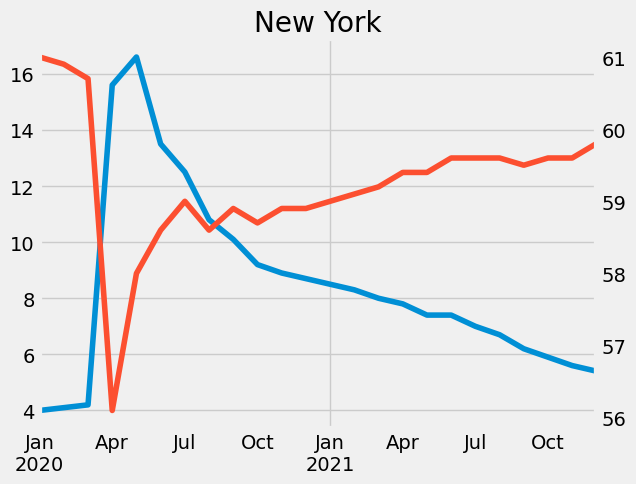

In [33]:
fig,ax=plt.subplots()
ax2=ax.twinx()
unemp_states.query('index >=2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

In [34]:
unemp_states=unemp_states.rename(columns={'the District of Columbia':'District of Columbia'})

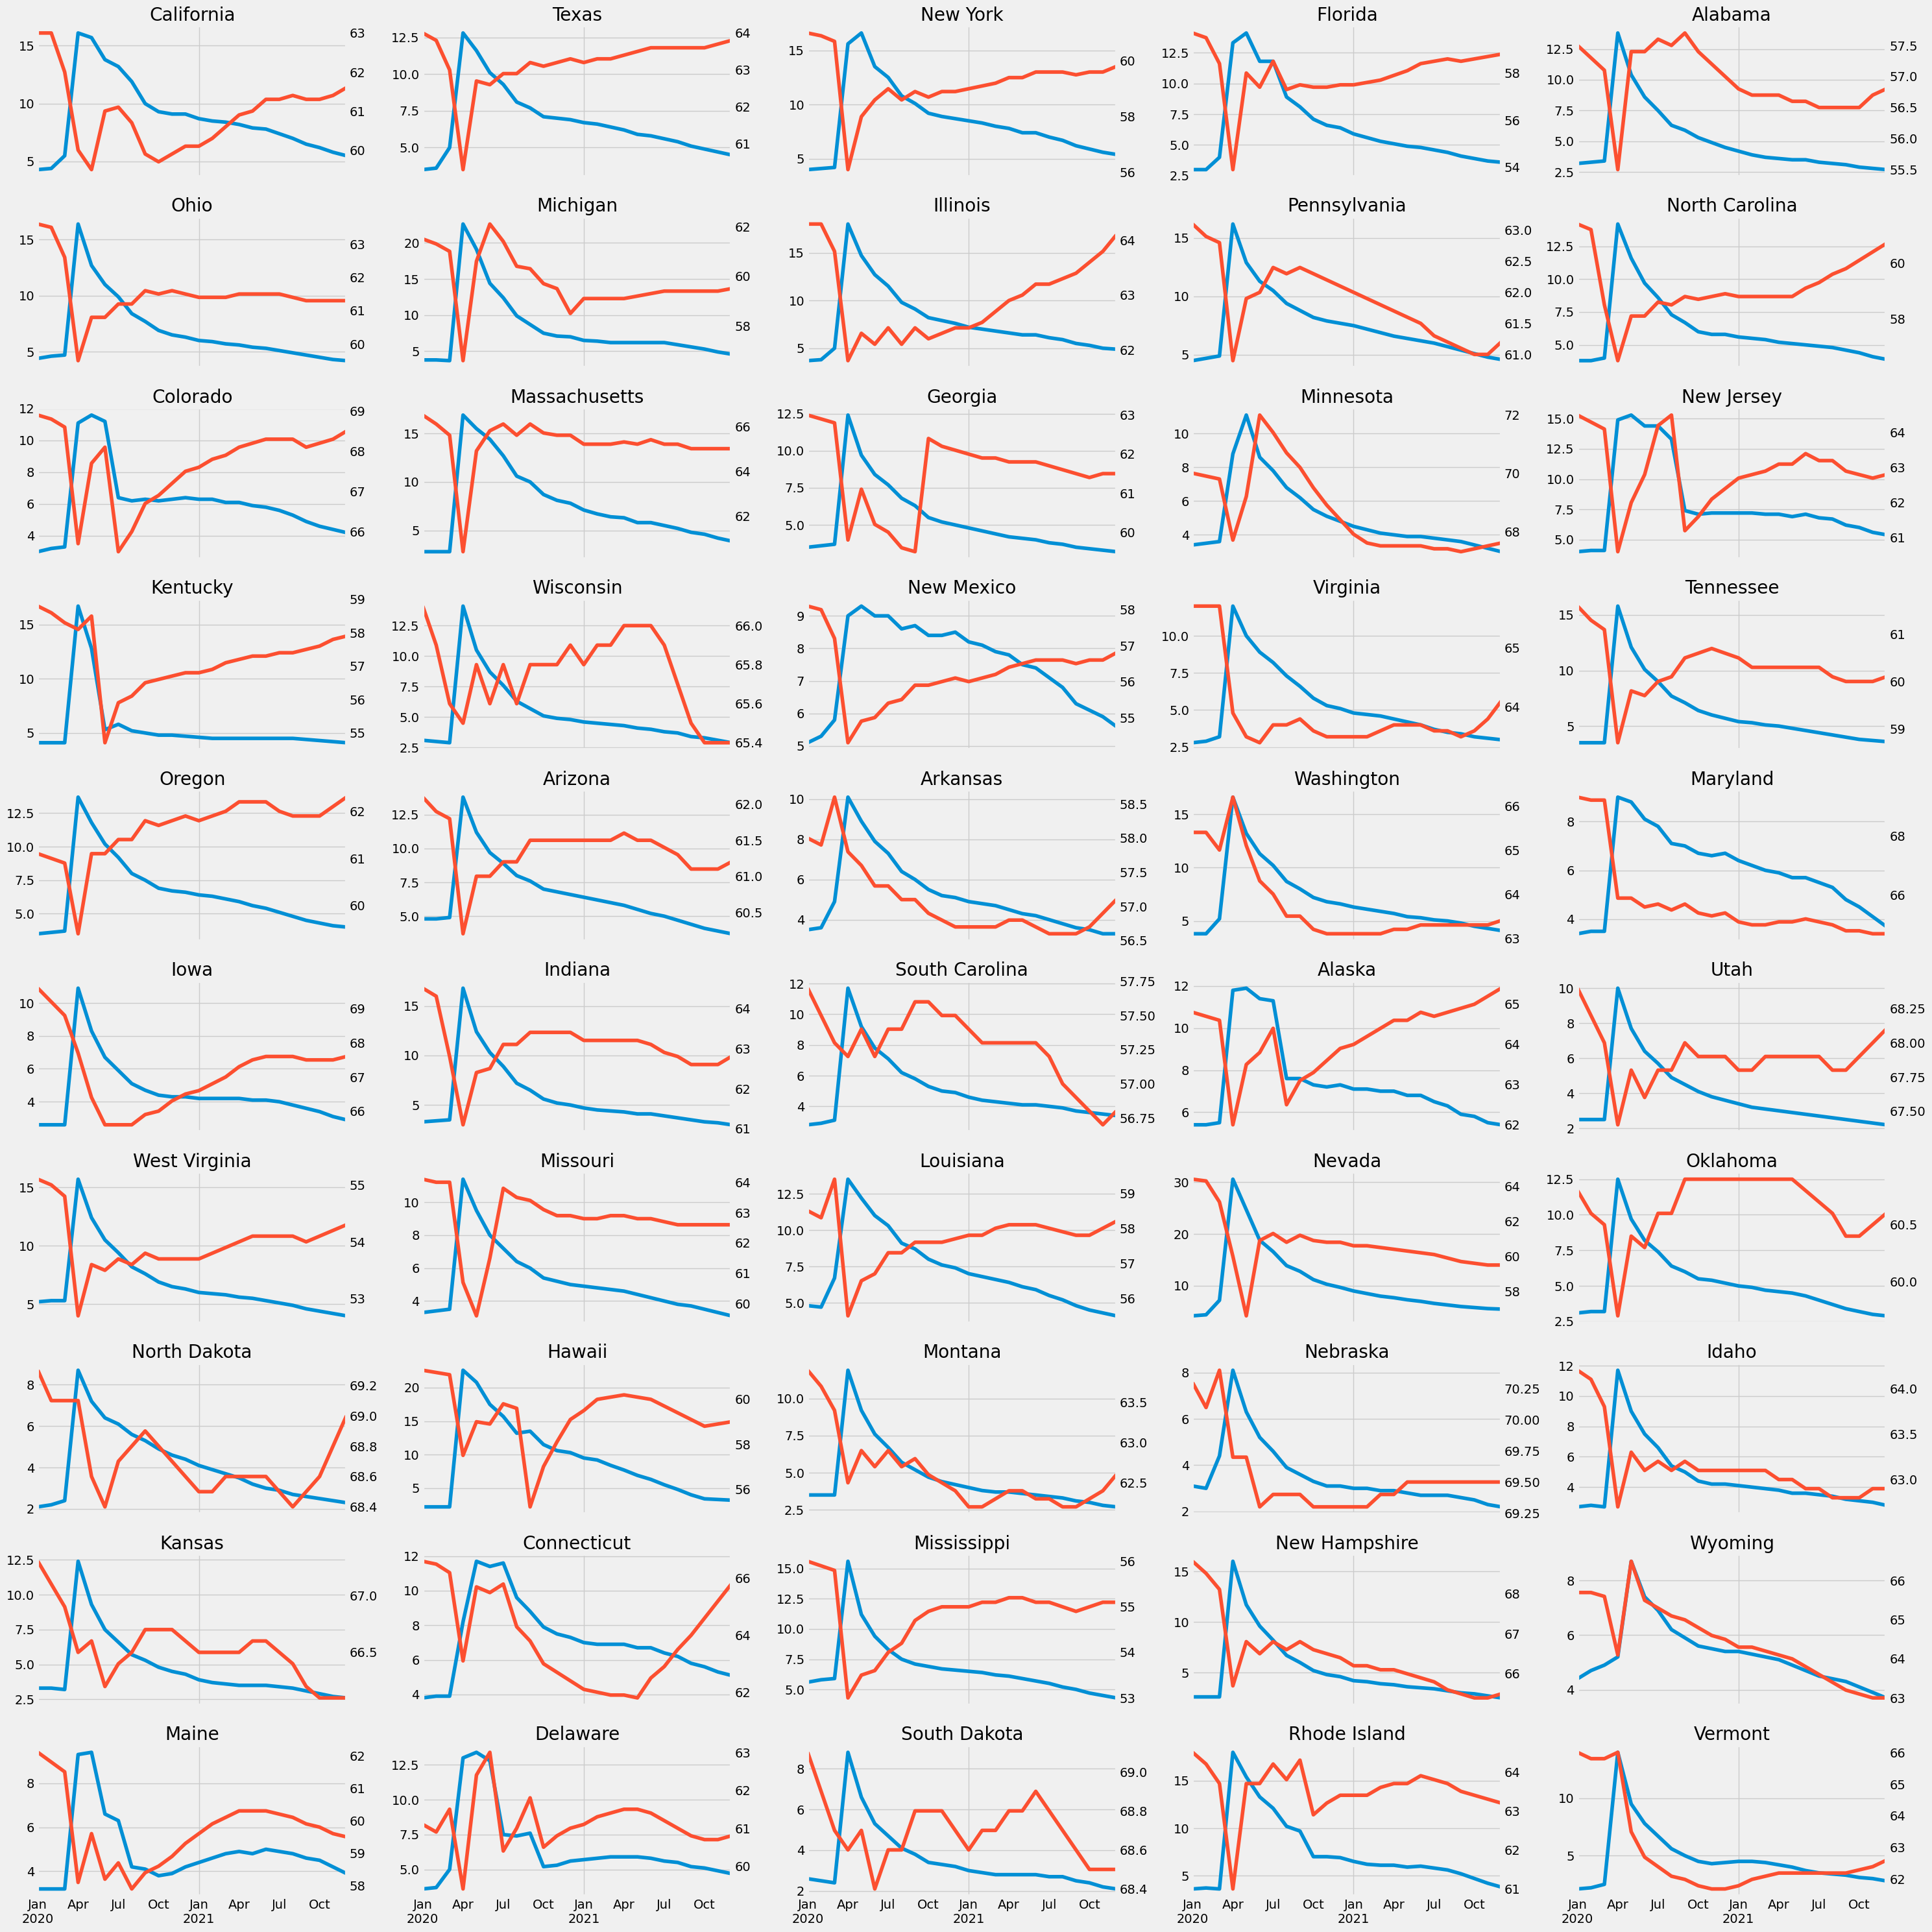

In [35]:
fig,axs=plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs=axs.flatten()

i=0
for x in unemp_states.columns:
    if x == 'District of Columbia':
        continue
    ax2=axs[i].twinx()
    unemp_states.query('index >=2020 and index < 2022')[x].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[x].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(x)
    i+=1
plt.tight_layout()
plt.show()